In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys, os
from typing import Dict, List, NamedTuple, Tuple
from collections import defaultdict
import time


In [6]:
resultsDF = pd.read_csv("../../evaluation_kgrec/results/result_raw", sep=",", header=0)
#this file should be obtained by running corresponding scripts from https://github.com/LadislavMalecek/UMAP2021
resultsDF.head()

,alg,group_id,user_id,metric,result
0,mf_230_1.0_avg20_sim_group_2,0_1,2747,AR,0.349839
1,mf_230_1.0_avg20_sim_group_2,0_1,2747,nDCG,0.651195
2,mf_230_1.0_avg20_sim_group_2,0_1,2047,AR,0.548269
3,mf_230_1.0_avg20_sim_group_2,0_1,2047,nDCG,0.755049
4,mf_230_1.0_avg20_sim_group_2,1_1,1244,AR,0.380399


In [7]:
def compute_metrics(alg_name, groups, results):
    # test_data are triplets: user_id, item_id, and rating
    #LP: test data is matrix user_id x item_id !!!!!! a ja si rikal, jakto ze ti to prirazeni funguje...

    avg_rating = []
    min_rating = []
    minmax_rating = []
    std_rating = []
    
    avg_nDCG_rating = []
    min_nDCG_rating = []
    minmax_nDCG_rating = []
    std_nDCG_rating = []
        
    for gid in groups:
        gid_res_ndcg = results.loc[(results.group_id == gid)&(results.metric == "nDCG")]
        gid_res_AR = results.loc[(results.group_id == gid)&(results.metric == "AR")] 
        
        #print(gid_res_ndcg)
        #print(gid_res_AR)
        
        group_users_mean_ratings = [i for i in gid_res_AR.result]
        group_users_ndcg_ratings = [i for i in gid_res_ndcg.result]
        
        #print(group_users_mean_ratings)
        if len(group_users_mean_ratings) > 0:
            avg_rating.append(np.average(group_users_mean_ratings)) 
            min = np.min(group_users_mean_ratings)
            min_rating.append(min) 
            max = np.max(group_users_mean_ratings)
            minmax_rating.append(0.0 if max == 0.0 else min/max)
            std_rating.append(np.std(group_users_mean_ratings)) 

            avg_nDCG_rating.append(np.average(group_users_ndcg_ratings)) 
            min = np.min(group_users_ndcg_ratings)
            min_nDCG_rating.append(min) 
            max = np.max(group_users_ndcg_ratings)
            minmax_nDCG_rating.append(0.0 if max == 0.0 else min/max)
            std_nDCG_rating.append(np.std(group_users_ndcg_ratings)) 

    #print(len(avg_rating))    
    results = pd.Series({
       "AR_avg": np.mean(avg_rating) ,
        "AR_min": np.mean(min_rating) ,
        "AR_min/max": np.mean(minmax_rating) ,
        #"AR_std": std_rating ,
        
        "nDCG_avg": np.mean(avg_nDCG_rating) ,
        "nDCG_min": np.mean(min_nDCG_rating) ,
        "nDCG_min/max": np.mean(minmax_nDCG_rating) #,
        #"nDCG_std": std_nDCG_rating 
    })
      
    return results

In [8]:
algs = resultsDF.alg.unique()
groups = resultsDF.group_id.unique()
metrics = resultsDF.metric.unique()

In [45]:
#meanResults_all = {}
whitelist = ['GFAR', '_avg20', 'FuzzyDHondtDirectOptimize_1', 'GreedyLM',  'FuzzyDHondt_1',  'SPGreedy',  'fai',  'xpo']
for res in ["resultRaw_coupled_unbiased_0",
            "resultRaw_coupled_unbiased_5",
            "resultRaw_coupled_unbiased_10",
            "resultRaw_coupled_unbiased_15",
            "resultRaw_coupled_unbiased_20",
            "resultRaw_coupled_unbiased_25",
            "resultRaw_coupled_unbiased_30",
            "resultRaw_coupled_unbiased_35",
            "resultRaw_coupled_unbiased_40",
            "resultRaw",
            "resultRaw_coupled"]:
    meanResults_all[res] = {}
    for grouptype in ["sim","div"]:
        meanResults_all[res][grouptype] = {}
        for size in ["2","4","8"]:
            meanResults_all[res][grouptype][size] = {}
            
            fileName = res+"_"+grouptype+"_"+size
            resultsDF = pd.read_csv(fileName, sep=",", header=None, names=["alg","group_id","user_id","metric","result"])
            algs = resultsDF.alg.unique()        
            metrics = resultsDF.metric.unique()
            groups = resultsDF.group_id.unique()        
            meanResults = {}
            for a in algs:
                for item in whitelist:
                    if item in a:
                        resPerAlg = resultsDF.loc[resultsDF.alg == a]            
                        meanResults_all[res][grouptype][size][a] = compute_metrics(a, groups, resPerAlg)

                        print(res,grouptype,size,a)
                        #print(meanResults_all[res][grouptype][size][a])
        

resultRaw_coupled sim 2 mf_230_1.0_avg20_sim_group_2
resultRaw_coupled sim 2 mf_230_1.0_avg20_sim_group_2_weighted
resultRaw_coupled sim 2 mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled sim 2 mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOptimize_1.0_weighted
resultRaw_coupled sim 2 mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0
resultRaw_coupled sim 2 mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0_weighted
resultRaw_coupled sim 2 mf_230_1.0_avg_sim_group_2_GFAR_1.0
resultRaw_coupled sim 2 mf_230_1.0_avg_sim_group_2_GreedyLM_1.0
resultRaw_coupled sim 2 mf_230_1.0_avg_sim_group_2_SPGreedy_1.0
resultRaw_coupled sim 2 mf_230_1.0_fai_sim_group_2
resultRaw_coupled sim 2 mf_230_1.0_xpo_sim_group_2
resultRaw_coupled sim 2 mf_data_fai_sim_group_2
resultRaw_coupled sim 2 mf_data_xpo_sim_group_2
resultRaw_coupled sim 4 mf_230_1.0_avg20_sim_group_4
resultRaw_coupled sim 4 mf_230_1.0_avg_sim_group_4_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled sim 4 mf_230_1.0_avg_sim_group_4_

In [46]:
reformed_dict = {}
for resKey, resDict in meanResults_all.items():
    for groupKey, groupDict in resDict.items():
        for sizeKey, sizeDict in groupDict.items():
            for algKey, values in sizeDict.items():
                reformed_dict[(resKey,groupKey,sizeKey,algKey)] = values

df_res = pd.DataFrame(reformed_dict).T
df_res

AR_avg  \
resultRaw_coupled_unbiased_0 sim 2 mf_230_1.0_avg20_sim_group_2                        0.007579   
                                   mf_230_1.0_avg20_sim_group_2_weighted               0.007431   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...  0.006333   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...  0.006781   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0          0.007627   
...                                                                                         ...   
resultRaw_coupled            div 8 mf_230_1.0_avg_div_group_8_GFAR_1.0                 0.101309   
                                   mf_230_1.0_avg_div_group_8_GreedyLM_1.0             0.082271   
                                   mf_230_1.0_avg_div_group_8_SPGreedy_1.0             0.089667   
                                   mf_230_1.0_fai_div_group_8                          0.096849   
                                   mf_230_1.0_xpo_div_group_8                          0.099797   

                                                                                         AR_min  \
resultRaw_coupled_unbiased_0 sim 2 mf_230_1.0_avg20_sim_group_2                        0.005577   
                                   mf_230_1.0_avg20_sim_group_2_weighted               0.003892   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...  0.004760   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...  0.003467   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0          0.005966   
...                                                                                         ...   
resultRaw_coupled            div 8 mf_230_1.0_avg_div_group_8_GFAR_1.0                 0.026540   
                                   mf_230_1.0_avg_div_group_8_GreedyLM_1.0             0.009230   
                                   mf_230_1.0_avg_div_group_8_SPGreedy_1.0             0.016290   
                                   mf_230_1.0_fai_div_group_8                          0.025610   
                                   mf_230_1.0_xpo_div_group_8                          0.022150   

                                                                                       AR_min/max  \
resultRaw_coupled_unbiased_0 sim 2 mf_230_1.0_avg20_sim_group_2                          0.608134   
                                   mf_230_1.0_avg20_sim_group_2_weighted                 0.402845   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...    0.626592   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...    0.396306   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0            0.661021   
...                                                                                           ...   
resultRaw_coupled            div 8 mf_230_1.0_avg_div_group_8_GFAR_1.0                   0.150917   
                                   mf_230_1.0_avg_div_group_8_GreedyLM_1.0               0.051984   
                                   mf_230_1.0_avg_div_group_8_SPGreedy_1.0               0.089786   
                                   mf_230_1.0_fai_div_group_8                            0.153830   
                                   mf_230_1.0_xpo_div_group_8                            0.120601   

                                                                                       nDCG_avg  \
resultRaw_coupled_unbiased_0 sim 2 mf_230_1.0_avg20_sim_group_2                        0.178786   
                                   mf_230_1.0_avg20_sim_group_2_weighted               0.174573   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...  0.155946   
                                   mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...  0.162149   
   

In [47]:
df_res.to_csv("../../evaluation_kgrec/results/results_all_mean.csv")

In [48]:
df_res.index[0]

('resultRaw_coupled_unbiased_0', 'sim', '2', 'mf_230_1.0_avg20_sim_group_2')

In [49]:
df_res.loc[df_res.index.get_level_values(0)=="resultRaw_coupled"].head(40).round(3)

AR_avg  \
resultRaw_coupled sim 2 mf_230_1.0_avg20_sim_group_2                         0.324   
                        mf_230_1.0_avg20_sim_group_2_weighted                0.316   
                        mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...   0.254   
                        mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...   0.281   
                        mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.322   
                        mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0_weig...   0.317   
                        mf_230_1.0_avg_sim_group_2_GFAR_1.0                  0.365   
                        mf_230_1.0_avg_sim_group_2_GreedyLM_1.0              0.351   
                        mf_230_1.0_avg_sim_group_2_SPGreedy_1.0              0.325   
                        mf_230_1.0_fai_sim_group_2                           0.363   
                        mf_230_1.0_xpo_sim_group_2                           0.365   
                        mf_data_fai_sim_group_2                              0.364   
                        mf_data_xpo_sim_group_2                              0.366   
                      4 mf_230_1.0_avg20_sim_group_4                         0.238   
                        mf_230_1.0_avg_sim_group_4_FuzzyDHondtDirectOpt...   0.205   
                        mf_230_1.0_avg_sim_group_4_FuzzyDHondt_1.0           0.237   
                        mf_230_1.0_avg_sim_group_4_GFAR_1.0                  0.261   
                        mf_230_1.0_avg_sim_group_4_GreedyLM_1.0              0.249   
                        mf_230_1.0_avg_sim_group_4_SPGreedy_1.0              0.244   
                        mf_230_1.0_fai_sim_group_4                           0.250   
                        mf_230_1.0_xpo_sim_group_4                           0.263   
                      8 mf_230_1.0_avg20_sim_group_8                         0.177   
                        mf_230_1.0_avg_sim_group_8_FuzzyDHondtDirectOpt...   0.152   
                        mf_230_1.0_avg_sim_group_8_FuzzyDHondt_1.0           0.178   
                        mf_230_1.0_avg_sim_group_8_GFAR_1.0                  0.202   
                        mf_230_1.0_avg_sim_group_8_GreedyLM_1.0              0.187   
                        mf_230_1.0_avg_sim_group_8_SPGreedy_1.0              0.181   
                        mf_230_1.0_fai_sim_group_8                           0.171   
                        mf_230_1.0_xpo_sim_group_8                           0.201   
                  div 2 mf_230_1.0_avg20_div_group_2                         0.242   
                        mf_230_1.0_avg_div_group_2_FuzzyDHondtDirectOpt...   0.163   
                        mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0           0.234   
                        mf_230_1.0_avg_div_group_2_GFAR_1.0                  0.258   
                        mf_230_1.0_avg_div_group_2_GreedyLM_1.0              0.247   
                        mf_230_1.0_avg_div_group_2_SPGreedy_1.0              0.243   
                        mf_230_1.0_fai_div_group_2                           0.258   
                        mf_230_1.0_xpo_div_group_2                           0.258   
                      4 mf_230_1.0_avg20_div_group_4                         0.132   
                        mf_230_1.0_avg_div_group_4_FuzzyDHondtDirectOpt...   0.088   
                        mf_230_1.0_avg_div_group_4_FuzzyDHondt_1.0           0.129   

                                                                            AR_min  \
resultRaw_coupled sim 2 mf_230_1.0_avg20_sim_group_2                         0.234   
                        mf_230_1.0_avg20_sim_group_2_weighted                0.166   
                        mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...   0.204   
                        mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...   0.148   
                        mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.259   
                        mf_230_1.

In [71]:
df_res.loc[df_res.index.get_level_values(0)=="resultRaw"].head(40).round(3)

AR_avg  \
resultRaw sim 2 mf_230_1.0_avg20_sim_group_2                         0.459   
                mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...   0.440   
                mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.457   
                mf_230_1.0_avg_sim_group_2_GFAR_1.0                  0.413   
                mf_230_1.0_avg_sim_group_2_GreedyLM_1.0              0.440   
                mf_230_1.0_avg_sim_group_2_SPGreedy_1.0              0.458   
                mf_230_1.0_fai_sim_group_2                           0.411   
                mf_230_1.0_xpo_sim_group_2                           0.414   
                mf_data_fai_sim_group_2                              0.411   
                mf_data_xpo_sim_group_2                              0.414   
              4 mf_230_1.0_avg20_sim_group_4                         0.364   
                mf_230_1.0_avg_sim_group_4_FuzzyDHondtDirectOpt...   0.350   
                mf_230_1.0_avg_sim_group_4_FuzzyDHondt_1.0           0.362   
                mf_230_1.0_avg_sim_group_4_GFAR_1.0                  0.299   
                mf_230_1.0_avg_sim_group_4_GreedyLM_1.0              0.350   
                mf_230_1.0_avg_sim_group_4_SPGreedy_1.0              0.357   
                mf_230_1.0_fai_sim_group_4                           0.286   
                mf_230_1.0_xpo_sim_group_4                           0.308   
              8 mf_230_1.0_avg20_sim_group_8                         0.294   
                mf_230_1.0_avg_sim_group_8_FuzzyDHondtDirectOpt...   0.280   
                mf_230_1.0_avg_sim_group_8_FuzzyDHondt_1.0           0.293   
                mf_230_1.0_avg_sim_group_8_GFAR_1.0                  0.247   
                mf_230_1.0_avg_sim_group_8_GreedyLM_1.0              0.279   
                mf_230_1.0_avg_sim_group_8_SPGreedy_1.0              0.273   
                mf_230_1.0_fai_sim_group_8                           0.208   
                mf_230_1.0_xpo_sim_group_8                           0.250   
          div 2 mf_230_1.0_avg20_div_group_2                         0.357   
                mf_230_1.0_avg_div_group_2_FuzzyDHondtDirectOpt...   0.330   
                mf_230_1.0_avg_div_group_2_FuzzyDHondt_1.0           0.353   
                mf_230_1.0_avg_div_group_2_GFAR_1.0                  0.329   
                mf_230_1.0_avg_div_group_2_GreedyLM_1.0              0.345   
                mf_230_1.0_avg_div_group_2_SPGreedy_1.0              0.357   
                mf_230_1.0_fai_div_group_2                           0.329   
                mf_230_1.0_xpo_div_group_2                           0.329   
              4 mf_230_1.0_avg20_div_group_4                         0.240   
                mf_230_1.0_avg_div_group_4_FuzzyDHondtDirectOpt...   0.221   
                mf_230_1.0_avg_div_group_4_FuzzyDHondt_1.0           0.237   
                mf_230_1.0_avg_div_group_4_GFAR_1.0                  0.199   
                mf_230_1.0_avg_div_group_4_GreedyLM_1.0              0.233   
                mf_230_1.0_avg_div_group_4_SPGreedy_1.0              0.238   

                                                                    AR_min  \
resultRaw sim 2 mf_230_1.0_avg20_sim_group_2                         0.394   
                mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOpt...   0.436   
                mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.426   
                mf_230_1.0_avg_sim_group_2_GFAR_1.0                  0.388   
                mf_230_1.0_avg_sim_group_2_GreedyLM_1.0              0.414   
                mf_230_1.0_avg_sim_group_2_SPGreedy_1.0              0.396   
                mf_230_1.0_fai_sim_group_2                           0.384   
                mf_230_1.0_xpo_sim_group_2                           0.389   
                mf_data_fai_sim_group_2                              0.384   
                mf_data_xpo_sim_group_2                              0.389   
           

In [72]:
df_res.loc[(df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="2")].index.get_level_values(3).unique()

Index(['mf_230_1.0_avg20_sim_group_2', 'mf_230_1.0_avg20_sim_group_2_weighted',
       'mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOptimize_1.0',
       'mf_230_1.0_avg_sim_group_2_FuzzyDHondtDirectOptimize_1.0_weighted',
       'mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0',
       'mf_230_1.0_avg_sim_group_2_FuzzyDHondt_1.0_weighted',
       'mf_230_1.0_avg_sim_group_2_GFAR_1.0',
       'mf_230_1.0_avg_sim_group_2_GreedyLM_1.0',
       'mf_230_1.0_avg_sim_group_2_SPGreedy_1.0', 'mf_230_1.0_fai_sim_group_2',
       'mf_230_1.0_xpo_sim_group_2', 'mf_data_fai_sim_group_2',
       'mf_data_xpo_sim_group_2'],
      dtype='object')

In [73]:
res_coupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled_unbiased_0")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_230_1.0_avg_sim_group_8_pref_AVG")].reset_index()
res_decoupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_230_1.0_avg_sim_group_8_pref_AVG")].reset_index()

res_coupled_8.corrwith(res_decoupled_8)

AR_avg          0.307733
AR_min         -0.594225
AR_min/max     -0.351612
nDCG_avg        0.534022
nDCG_min       -0.500528
nDCG_min/max   -0.480057
dtype: float64

In [74]:
res_coupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled_unbiased_0")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_2_pref_AVG")].reset_index()
res_decoupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_2_pref_AVG")].reset_index()

res_coupled_2.corrwith(res_decoupled_2)

AR_avg         -0.476952
AR_min         -0.465018
AR_min/max     -0.194461
nDCG_avg       -0.430744
nDCG_min       -0.520032
nDCG_min/max   -0.247773
dtype: float64

In [75]:
res_coupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_4_pref_AVG")].reset_index()
res_decoupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_4_pref_AVG")].reset_index()

res_coupled_4.corrwith(res_decoupled_4)

AR_avg         -0.569164
AR_min         -0.772695
AR_min/max      0.257269
nDCG_avg       -0.157864
nDCG_min       -0.676945
nDCG_min/max   -0.177480
dtype: float64

In [76]:
res_coupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_2_pref_AVG")].reset_index()
res_decoupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_2_pref_AVG")].reset_index()

res_coupled_2.corrwith(res_decoupled_2)

AR_avg          0.072752
AR_min          0.215707
AR_min/max      0.934613
nDCG_avg        0.040091
nDCG_min        0.355522
nDCG_min/max    0.943733
dtype: float64

In [77]:
res_coupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_4_pref_AVG")].reset_index()
res_decoupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_4_pref_AVG")].reset_index()

res_coupled_4.corrwith(res_decoupled_4)

AR_avg         -0.550140
AR_min         -0.251715
AR_min/max      0.361218
nDCG_avg       -0.510018
nDCG_min       -0.371475
nDCG_min/max    0.300731
dtype: float64

In [78]:
res_coupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_8_pref_AVG")].reset_index()
res_decoupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_8_pref_AVG")].reset_index()

res_coupled_8.corrwith(res_decoupled_8)

AR_avg         -0.621130
AR_min         -0.575477
AR_min/max     -0.234900
nDCG_avg       -0.541871
nDCG_min       -0.663147
nDCG_min/max   -0.400607
dtype: float64

In [79]:
df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled_unbiased_0")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_8_pref_AVG")]

AR_avg  \
resultRaw_coupled_unbiased_0 div 8 mf_230_1.0_avg20_div_group_8                        0.001611   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondtDirectOpt...  0.001187   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondt_1.0          0.001629   
                                   mf_230_1.0_avg_div_group_8_GFAR_1.0                 0.002175   
                                   mf_230_1.0_avg_div_group_8_GreedyLM_1.0             0.001666   
                                   mf_230_1.0_avg_div_group_8_SPGreedy_1.0             0.001841   
                                   mf_230_1.0_fai_div_group_8                          0.002119   
                                   mf_230_1.0_xpo_div_group_8                          0.002141   

                                                                                         AR_min  \
resultRaw_coupled_unbiased_0 div 8 mf_230_1.0_avg20_div_group_8                        0.000051   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondtDirectOpt...  0.000049   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondt_1.0          0.000142   
                                   mf_230_1.0_avg_div_group_8_GFAR_1.0                 0.000447   
                                   mf_230_1.0_avg_div_group_8_GreedyLM_1.0             0.000137   
                                   mf_230_1.0_avg_div_group_8_SPGreedy_1.0             0.000246   
                                   mf_230_1.0_fai_div_group_8                          0.000430   
                                   mf_230_1.0_xpo_div_group_8                          0.000365   

                                                                                       AR_min/max  \
resultRaw_coupled_unbiased_0 div 8 mf_230_1.0_avg20_div_group_8                          0.012649   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondtDirectOpt...    0.014460   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondt_1.0            0.037538   
                                   mf_230_1.0_avg_div_group_8_GFAR_1.0                   0.105063   
                                   mf_230_1.0_avg_div_group_8_GreedyLM_1.0               0.035243   
                                   mf_230_1.0_avg_div_group_8_SPGreedy_1.0               0.061712   
                                   mf_230_1.0_fai_div_group_8                            0.103747   
                                   mf_230_1.0_xpo_div_group_8                            0.084171   

                                                                                       nDCG_avg  \
resultRaw_coupled_unbiased_0 div 8 mf_230_1.0_avg20_div_group_8                        0.034417   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondtDirectOpt...  0.023435   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondt_1.0          0.034086   
                                   mf_230_1.0_avg_div_group_8_GFAR_1.0                 0.044285   
                                   mf_230_1.0_avg_div_group_8_GreedyLM_1.0             0.035041   
                                   mf_230_1.0_avg_div_group_8_SPGreedy_1.0             0.038605   
                                   mf_230_1.0_fai_div_group_8                          0.040947   
                                   mf_230_1.0_xpo_div_group_8                          0.042247   

                                                                                       nDCG_min  \
resultRaw_coupled_unbiased_0 div 8 mf_230_1.0_avg20_div_group_8                        0.000904   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondtDirectOpt...  0.000919   
                                   mf_230_1.0_avg_div_group_8_FuzzyDHondt_1.0          0.002558   
                                   mf_230_1.0_avg_div_group_8_GFAR_1.0                 0.007794   
        

In [80]:
df_tmp = df_res.reset_index(level=3, drop=False, inplace=False)
df_tmp.level_3 = df_tmp.level_3.str.replace("mf_30_1.0_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("mf_230_1.0_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("_1.0","")
df_tmp.level_3 = df_tmp.level_3.str.replace("avg_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("sim_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("div_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_2","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_3","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_4","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_8","")
df_tmp.level_3 = df_tmp.level_3.str.replace("_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("FuzzyDHondtDirectOptimize","EP-FuzzDA")
df_tmp.level_3 = df_tmp.level_3.str.replace("FuzzyDHondt","FuzzDA")
df_tmp.level_3 = df_tmp.level_3.str.replace("fai","FAI")
df_tmp.level_3 = df_tmp.level_3.str.replace("xpo","XPO")
df_tmp.level_3 = df_tmp.level_3.str.replace("avg20","AVG")

df_tmp = df_tmp.loc[(df_tmp.level_3!="prefAVG")&
                  (df_tmp.level_3!="EP-FuzzDAweighted")&
                  (df_tmp.level_3!="FuzzDAweighted")&
                  (df_tmp.level_3!="mfdataFAI")&
                  (df_tmp.level_3!="mfdataXPO")&
                  (df_tmp.level_3!="AVGweighted")]

df_tmp.level_3.unique()

array(['AVG', 'EP-FuzzDA', 'FuzzDA', 'GFAR', 'GreedyLM', 'SPGreedy',
       'FAI', 'XPO'], dtype=object)

In [81]:
df_renamed = df_tmp.set_index("level_3", append=True)
df_renamed.head(10)

AR_avg    AR_min  AR_min/max  \
                                   level_3                                     
resultRaw_coupled_unbiased_0 sim 2 AVG        0.007579  0.005577    0.608134   
                                   EP-FuzzDA  0.006333  0.004760    0.626592   
                                   FuzzDA     0.007627  0.005966    0.661021   
                                   GFAR       0.008333  0.006685    0.686697   
                                   GreedyLM   0.008128  0.006506    0.683432   
                                   SPGreedy   0.007606  0.005632    0.614442   
                                   FAI        0.008283  0.006642    0.686353   
                                   XPO        0.008356  0.006692    0.685715   
                                 4 AVG        0.005482  0.002808    0.346254   
                                   EP-FuzzDA  0.004950  0.002628    0.360521   

                                              nDCG_avg  nDCG_min  nDCG_min/max  
                                   level_3                                      
resultRaw_coupled_unbiased_0 sim 2 AVG        0.178786  0.127362      0.580931  
                                   EP-FuzzDA  0.155946  0.117376      0.623006  
                                   FuzzDA     0.178550  0.135171      0.631025  
                                   GFAR       0.186494  0.147772      0.673122  
                                   GreedyLM   0.185005  0.144262      0.656626  
                                   SPGreedy   0.172715  0.125650      0.600973  
                                   FAI        0.177722  0.140509      0.673383  
                                   XPO        0.172583  0.131937      0.640508  
                                 4 AVG        0.129806  0.061413      0.309045  
                                   EP-FuzzDA  0.114997  0.059619      0.347226

In [82]:
df_dictionary = {}
for groupKey in df_renamed.index.get_level_values(1).unique():
    for sizeKey in df_renamed.index.get_level_values(2).unique():
        df_tmp = pd.DataFrame({"alg":df_renamed.index.get_level_values(3).unique()})
        df_tmp.set_index("alg", drop=False, inplace=True)
        df_dictionary[(groupKey,sizeKey)] = df_tmp
        
for resKey in df_renamed.index.get_level_values(0).unique():
    for groupKey in df_renamed.index.get_level_values(1).unique():
        for sizeKey in df_renamed.index.get_level_values(2).unique():
            currRes = df_renamed.loc[(df_renamed.index.get_level_values(0)==resKey)&
                  (df_renamed.index.get_level_values(1)==groupKey)&
                  (df_renamed.index.get_level_values(2)==sizeKey)]
            maxVals = currRes.max() 
            currRes_norm = currRes/maxVals
            currRes_norm.columns = [i+"_"+resKey.replace("resultRaw_","") for i in currRes_norm.columns]
            currRes_norm.reset_index(2, drop=True, inplace=True)
            currRes_norm.reset_index(1, drop=True, inplace=True)
            currRes_norm.reset_index(0, drop=True, inplace=True)
            
            try:
                df_dictionary[(groupKey,sizeKey)] = pd.concat([df_dictionary[(groupKey,sizeKey)], currRes_norm], axis=1)
            except:
                #print(df_dictionary[(groupKey,sizeKey)])
                print(currRes_norm)
            #for i in currRes_norm.columns:  
            #    print(i)
            #    print(df_dictionary[(groupKey,sizeKey)].columns)
            #    df_dictionary[(groupKey,sizeKey)][i] = currRes_norm[i]
            
df_dictionary[("sim","2")]            

,alg,AR_avg_coupled_unbiased_0,AR_min_coupled_unbiased_0,AR_min/max_coupled_unbiased_0,nDCG_avg_coupled_unbiased_0,nDCG_min_coupled_unbiased_0,nDCG_min/max_coupled_unbiased_0,AR_avg_coupled_unbiased_5,AR_min_coupled_unbiased_5,AR_min/max_coupled_unbiased_5,...,AR_min/max_resultRaw,nDCG_avg_resultRaw,nDCG_min_resultRaw,nDCG_min/max_resultRaw,AR_avg_coupled,AR_min_coupled,AR_min/max_coupled,nDCG_avg_coupled,nDCG_min_coupled,nDCG_min/max_coupled
level_3,,,,,,,,,,,,,,,,,,,,,
AVG,AVG,0.907072,0.833475,0.885594,0.958669,0.861882,0.862706,0.929930,0.856556,0.895674,...,0.776844,0.998690,0.943065,0.899838,0.885861,0.761145,0.811799,0.919530,0.805012,0.823229
EP-FuzzDA,EP-FuzzDA,0.757893,0.711317,0.912473,0.836197,0.794306,0.925188,0.797381,0.749067,0.918207,...,1.000000,0.972957,0.954336,0.965184,0.695205,0.665382,0.934553,0.771926,0.734286,0.916995
FuzzDA,FuzzDA,0.912824,0.891601,0.962610,0.957404,0.914723,0.937097,0.934999,0.912977,0.966133,...,0.890938,1.000000,1.000000,1.000000,0.881274,0.841864,0.935209,0.917670,0.870761,0.920008
GFAR,GFAR,0.997232,0.998993,1.000000,1.000000,1.000000,0.999612,0.996407,0.997645,0.999585,...,0.902540,0.908841,0.898484,0.977690,0.998844,1.000000,1.000000,1.000000,1.000000,0.998055
GreedyLM,GreedyLM,0.972722,0.972288,0.995246,0.992013,0.976246,0.975115,0.981635,0.978488,0.992207,...,0.905424,0.969775,0.962785,0.986359,0.961568,0.954595,0.987375,0.968598,0.952536,0.970657
SPGreedy,SPGreedy,0.910261,0.841610,0.894779,0.926116,0.850296,0.892469,0.932463,0.863506,0.903571,...,0.784301,0.968603,0.914279,0.898881,0.889523,0.772611,0.824357,0.903878,0.809693,0.854397
FAI,FAI,0.991341,0.992628,0.999500,0.952962,0.950847,1.000000,0.990479,0.991342,0.999167,...,0.895609,0.871614,0.841942,0.938618,0.993447,0.994405,0.999691,0.961542,0.960941,1.000000
XPO,XPO,1.000000,1.000000,0.998570,0.925409,0.892840,0.951180,1.000000,1.000000,1.000000,...,0.900355,0.838877,0.791793,0.899345,1.000000,0.999266,0.997814,0.908225,0.876835,0.945420


In [86]:
AR_avg = ["AR_avg_coupled"]+["AR_avg_coupled_unbiased_"+i for i in ["5","10","15","20","25","30","35","40"]]+["AR_avg_resultRaw"]
AR_min = [i.replace("AR_avg","AR_min") for i in AR_avg]
AR_minMax = [i.replace("AR_avg","AR_min/max") for i in AR_avg]
ndcg_avg = [i.replace("AR_avg","nDCG_avg") for i in AR_avg]
ndcg_min = [i.replace("AR_avg","nDCG_min") for i in AR_avg]
ndcg_minMax = [i.replace("AR_avg","nDCG_min/max") for i in AR_avg]

metrics = [AR_avg,AR_min,AR_minMax,ndcg_avg,ndcg_min,ndcg_minMax]
#ndcg_minMax

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns

In [88]:
sorted(df_dictionary[("sim","2")].index.tolist())

['AVG', 'EP-FuzzDA', 'FAI', 'FuzzDA', 'GFAR', 'GreedyLM', 'SPGreedy', 'XPO']

<ipython-input-89-7d299ec90e51>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-89-7d299ec90e51>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-89-7d299ec90e51>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


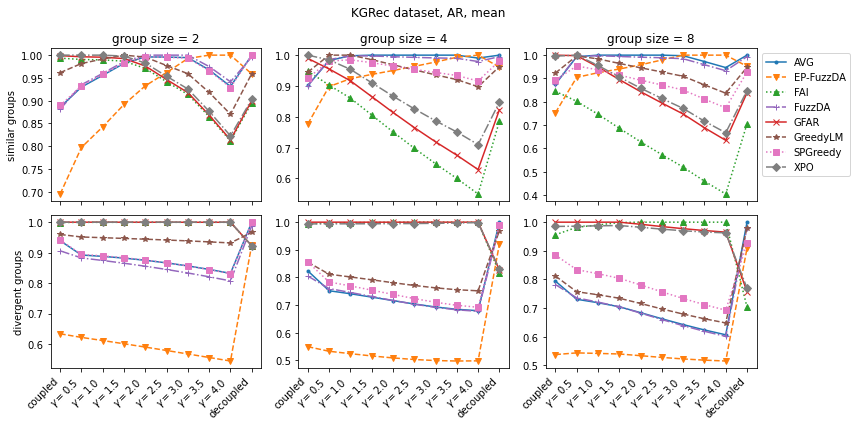

In [89]:
#depict AR_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(2,3,figsize=(12,6),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][AR_avg]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i,j].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_title("group size = 2")
ax[0,1].set_title("group size = 4")
ax[0,2].set_title("group size = 8")

ax[0,0].set_ylabel("similar groups")
ax[1,0].set_ylabel("divergent groups")

ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("KGRec dataset, AR, mean")
plt.tight_layout()
plt.savefig("../../evaluation_kgrec/results/img/AR_avg.png", dpi=300)

<ipython-input-90-b6bea3268eaf>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-90-b6bea3268eaf>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-90-b6bea3268eaf>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


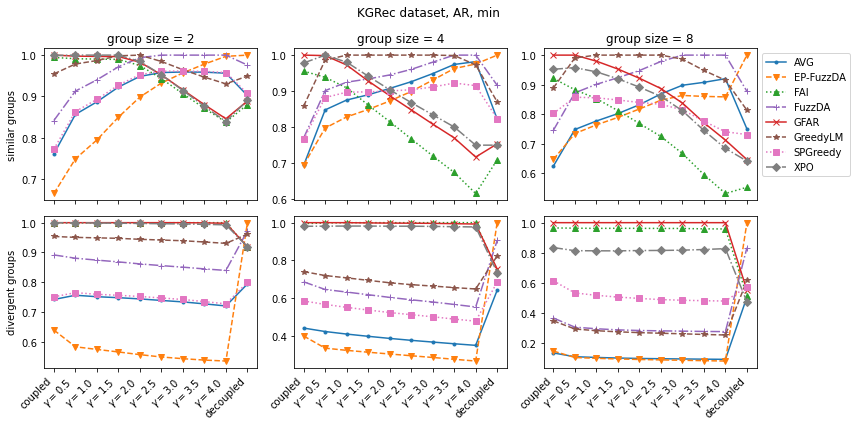

In [90]:
#depict AR_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(2,3,figsize=(12,6),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][AR_min]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i,j].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_title("group size = 2")
ax[0,1].set_title("group size = 4")
ax[0,2].set_title("group size = 8")

ax[0,0].set_ylabel("similar groups")
ax[1,0].set_ylabel("divergent groups")

ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("KGRec dataset, AR, min")
plt.tight_layout()
plt.savefig("../../evaluation_kgrec/results/img/AR_min.png", dpi=300)

<ipython-input-67-a6127e4dd429>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-67-a6127e4dd429>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',


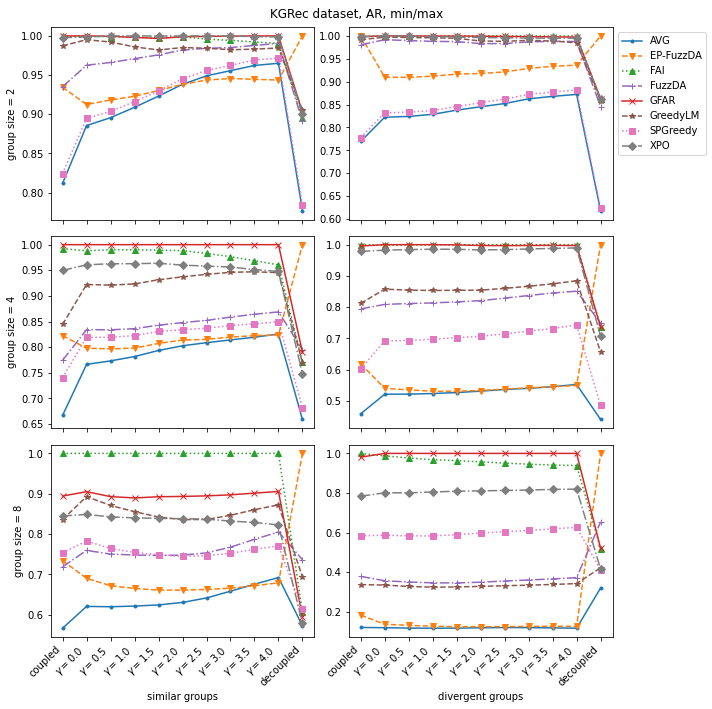

In [67]:
#depict AR_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(3,2,figsize=(10,10),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][AR_minMax]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[j,i].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,1].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_ylabel("group size = 2")
ax[1,0].set_ylabel("group size = 4")
ax[2,0].set_ylabel("group size = 8")

ax[2,0].set_xlabel("similar groups")
ax[2,1].set_xlabel("divergent groups")

ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("KGRec dataset, AR, min/max")
plt.tight_layout()
plt.savefig("../../evaluation_kgrec/results/img/AR_minMax.png", dpi=300)

<ipython-input-68-cd9fda9dfc8b>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-68-cd9fda9dfc8b>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',


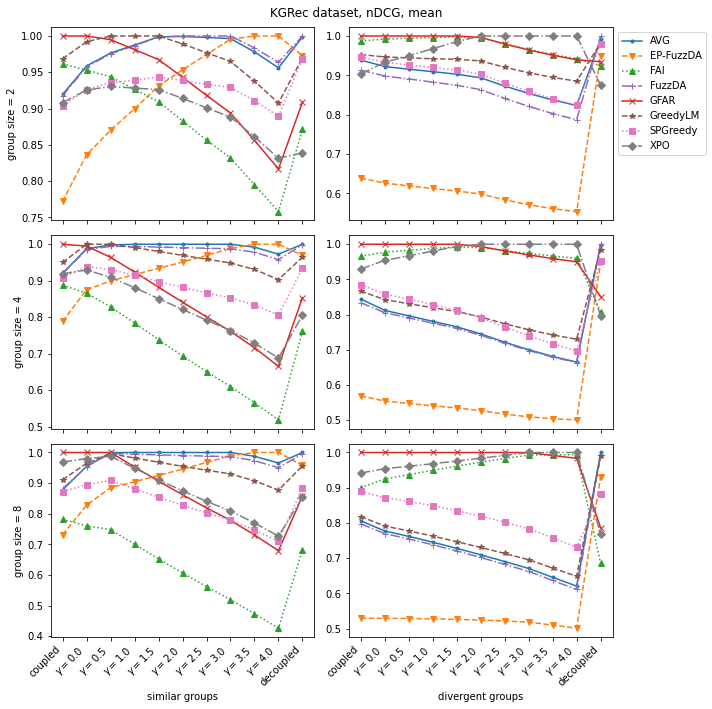

In [68]:
#depict ndcg_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(3,2,figsize=(10,10),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][ndcg_avg]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[j,i].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,1].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_ylabel("group size = 2")
ax[1,0].set_ylabel("group size = 4")
ax[2,0].set_ylabel("group size = 8")

ax[2,0].set_xlabel("similar groups")
ax[2,1].set_xlabel("divergent groups")

ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("KGRec dataset, nDCG, mean")
plt.tight_layout()
plt.savefig("../../evaluation_kgrec/results/img/ndcg_avg.png", dpi=300)

<ipython-input-69-db6422894e5f>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-69-db6422894e5f>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',


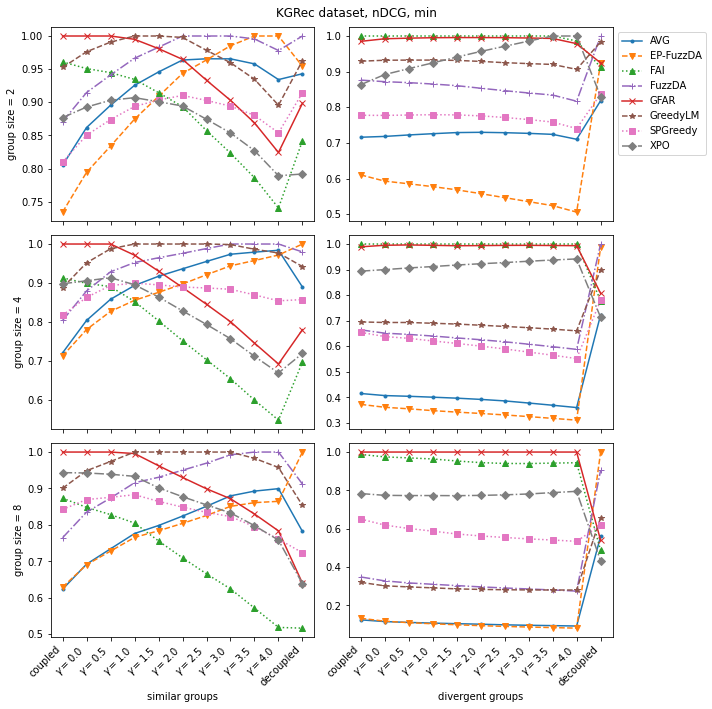

In [69]:
#depict ndcg_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(3,2,figsize=(10,10),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][ndcg_min]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[j,i].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,1].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_ylabel("group size = 2")
ax[1,0].set_ylabel("group size = 4")
ax[2,0].set_ylabel("group size = 8")

ax[2,0].set_xlabel("similar groups")
ax[2,1].set_xlabel("divergent groups")

ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("KGRec dataset, nDCG, min")
plt.tight_layout()
plt.savefig("../../evaluation_kgrec/results/img/ndcg_min.png", dpi=300)

<ipython-input-70-474f329cbd1d>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-70-474f329cbd1d>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',


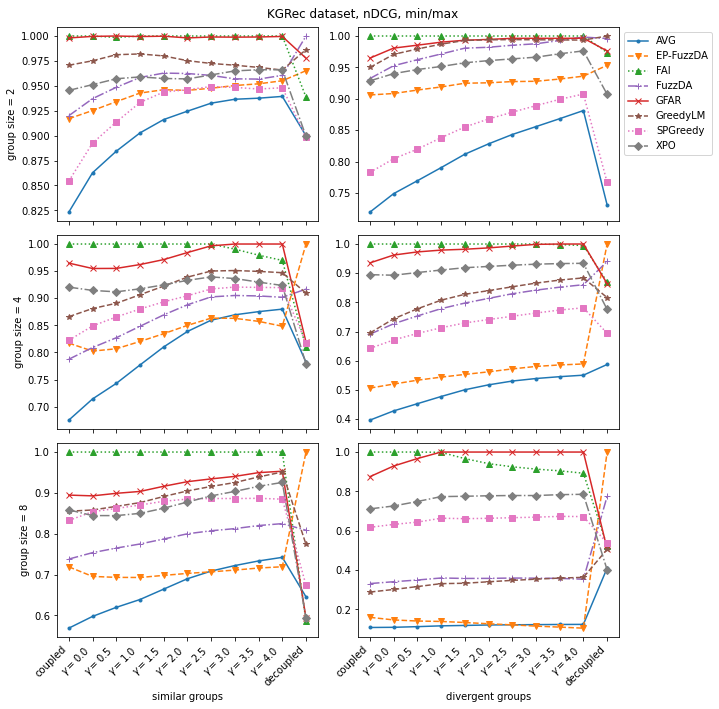

In [70]:
#depict ndcg_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(3,2,figsize=(10,10),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][ndcg_minMax]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[j,i].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,1].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_ylabel("group size = 2")
ax[1,0].set_ylabel("group size = 4")
ax[2,0].set_ylabel("group size = 8")

ax[2,0].set_xlabel("similar groups")
ax[2,1].set_xlabel("divergent groups")

ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.0$',r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("KGRec dataset, nDCG, min/max")
plt.tight_layout()
plt.savefig("../../evaluation_kgrec/results/img/ndcg_minMax.png", dpi=300)

In [92]:
df_dictionary[("sim","2")][AR_min[-2:]].corr(method="kendall")

,AR_min_coupled_unbiased_40,AR_min_resultRaw
AR_min_coupled_unbiased_40,1.000000,0.714286
AR_min_resultRaw,0.714286,1.000000


In [93]:
df_dictionary[("sim","4")][AR_min[-2:]].corr(method="kendall")

,AR_min_coupled_unbiased_40,AR_min_resultRaw
AR_min_coupled_unbiased_40,1.000000,0.642857
AR_min_resultRaw,0.642857,1.000000


In [94]:
df_dictionary[("sim","8")][AR_min[-2:]].corr(method="kendall")

,AR_min_coupled_unbiased_40,AR_min_resultRaw
AR_min_coupled_unbiased_40,1.000000,0.714286
AR_min_resultRaw,0.714286,1.000000
